<a href="https://colab.research.google.com/github/deviapujiastuti/DIF62130_A_24-25_2311531005_devia/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LANGKAH LANGKAH PCA**

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples', n_samples)
print('Number of features', n_features)

Number of samples 150
Number of features 4


viisualisasi fitur(variabel independen) saling berhubungan,visualisasi melalui histogram dan scatter plots.

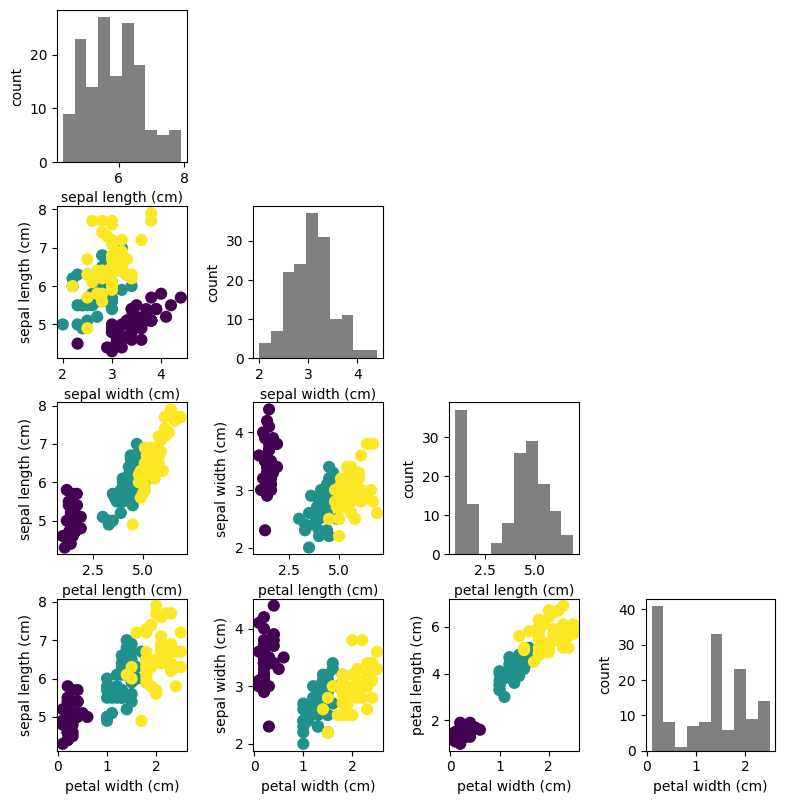

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8,8))
fig.tight_layout()

names = iris.feature_names

for i,j in zip (*np.triu_indices_from(ax, k=1)):
    ax[j,i].scatter(X[:,j], X[:,i], c=y, s=60, cmap='viridis')
    ax[j,i].set_xlabel(names[j])
    ax[j,i].set_ylabel(names[i])
    ax[i,j].set_axis_off()

for i in range (n_features):
    ax[i,i].hist(X[:,i], color = 'grey')
    ax[i,i].set_ylabel('count')
    ax[i,i].set_xlabel(names[i])

## **Standarisasi Data**

Standarisasi data adalah proses mengubah skala atau rentang data agar memiliki nilai rata-rata (mean) nol dan standar deviasi satu. Proses ini dilakukan untuk memastikan bahwa setiap fitur dalam dataset memiliki kontribusi yang setara dalam analisis atau pemodelan, terutama pada algoritma yang sensitif terhadap perbedaan skala, seperti regresi linear, SVM, dan KNN. Tujuan utama standarisasi adalah meningkatkan kinerja dan akurasi model dengan menghindari dominasi fitur yang memiliki nilai lebih besar. Pengaruh dari standarisasi data sangat signifikan karena dapat mempercepat konvergensi dalam proses pelatihan model, mengurangi bias akibat skala data yang berbeda, serta menghasilkan model yang lebih stabil dan dapat diandalkan.

In [ ]:
def mean(x): #np.mean(X, axis = 0)
  return sum(x)/len(x)

def std(x): #np.std(X, axis = 0)
  return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
  return (X - mean(X))/std(X)

X_std = Standardize_data(X)

In [ ]:
print("Data sebelum standarisasi:")
print(X[:5]) # Menampilkan 5 baris pertama sebelum standarisasi

print("\nData sesudah standarisasi:")
print(X_std[:5]) # Menampilkan 5 baris pertama sesudah standarisasi

Data sebelum standarisasi:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Data sesudah standarisasi:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


# **HITUNG COVARIANCE MATRIX**

membuat sebuah matriks yang menunjukkan hubungan linier antar fitur (variabel) dalam sebuah dataset. Covariance matrix membantu kita memahami bagaimana dua variabel berubah bersama-sama: apakah mereka meningkat/menurun secara bersamaan (positif), saling berlawanan (negatif), atau tidak saling memengaruhi (mendekati nol).

In [ ]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) #np.cov(X_std.T)

In [ ]:
print("\nCovariance Matrix:")
cov_mat


Covariance Matrix:


array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# **HITUNG EIGENVECTORS & EIGENVALUES dari CONVARIANCE MATRIX**

In [ ]:
from numpy.linalg import eig

eig_vals, eig_vecs = eig(cov_mat)

max_abs_idx = np.argmax(np.abs(eig_vecs), axis = 0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


# **URUTKAN EIGENVECTORS dan EIGENVALUE**

In [ ]:
eig_pairs =  [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


# **PILIH PRINCIPAL COMPONENTS(PC)**

In [ ]:
k = 2
W = eig_vecs_sorted[:k, :]

print(W.shape)

(2, 4)


Explained Variance: [72.96 22.85  3.67  0.52] 
Cumulative Explaine Variance: [ 72.96  95.81  99.48 100.  ] 


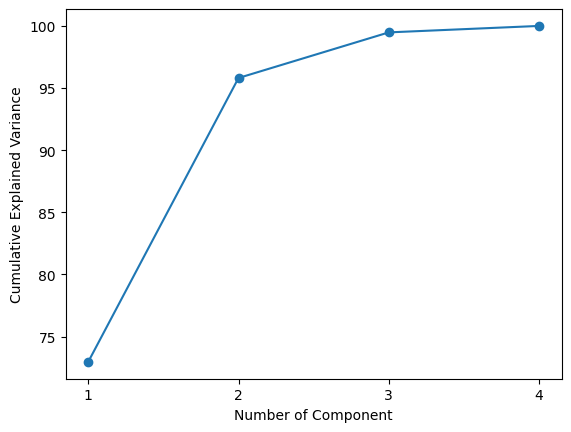

In [ ]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i/eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance,2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained Variance: {} '.format(explained_variance))
print('Cumulative Explaine Variance: {} '.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
X_proj = X_std.dot(W. T)
print('Data Hasil Transformasi')
print(X_proj.shape)

print('Dimensi Data Awal')
print(X.shape)

Data Hasil Transformasi
(150, 2)
Dimensi Data Awal
(150, 4)


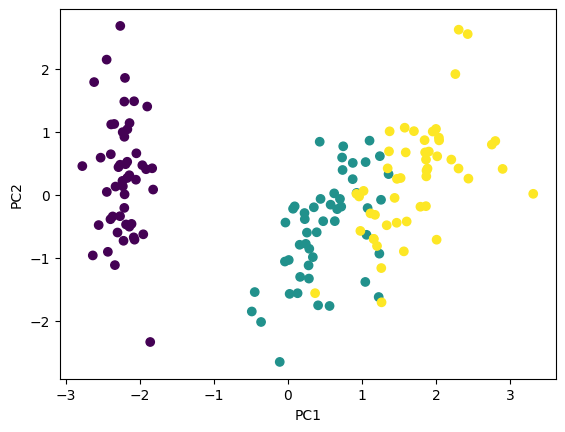

In [ ]:
plt.scatter(X_proj[:,0], X_proj[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# **PCA dengan Scikit-Learn**

Data Hasil Transformasi (dengan Scikit-Learn):
(150, 2)
Explained Variance Ratio (dengan Scikit-Learn):
[0.72962445 0.22850762]
Cumulative Explained Variance Ratio (dengan Scikit-Learn):
[0.72962445 0.95813207]


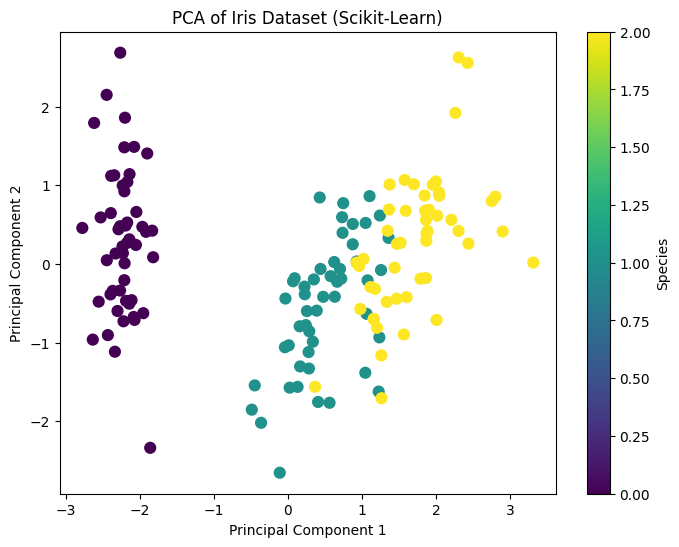

In [ ]:
# prompt: PCA dengan Scikit-Learn

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print('Data Hasil Transformasi (dengan Scikit-Learn):')
print(X_pca.shape)

print('Explained Variance Ratio (dengan Scikit-Learn):')
print(pca.explained_variance_ratio_)

print('Cumulative Explained Variance Ratio (dengan Scikit-Learn):')
print(np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=60, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (Scikit-Learn)')
plt.colorbar(label='Species')
plt.show()